In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
import gc

In [3]:
# Paths to the data folders in Kaggle
data_dir = '/kaggle/input/fruit-infection-disease-dataset'
train_dir = os.path.join(data_dir, 'sl_train')
test_dir = os.path.join(data_dir, 'sl_test')
validation_dir = os.path.join(data_dir, 'sl_valid')

In [4]:
# Data Augmentation and rescale parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
img_height = 416
img_width = 416
batch_size = 64

In [8]:
# Load images and apply Data Augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = "rgb")    

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = "rgb")

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = "rgb")

Found 2907 images belonging to 12 classes.
Found 1420 images belonging to 12 classes.
Found 1166 images belonging to 12 classes.


Image dimensions: (416, 416, 3)


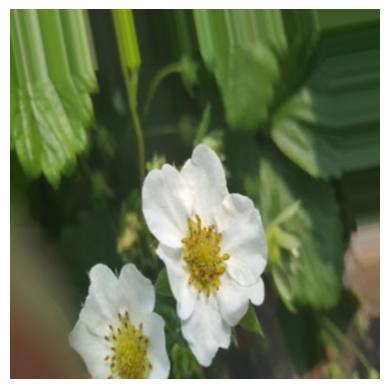

In [33]:
# Get a sample of images from the generator
sample_images, sample_labels = next(train_generator)

# Take the first sample image
sample_image = sample_images[0]

# Print the dimensions of the image
print("Image dimensions:", sample_image.shape)

# View the image
plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [34]:
# First test model.
modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(12, activation='softmax')
])

In [8]:
# Second test model.
modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.BatchNormalization(),
    
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
   
  tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.BatchNormalization(),
    
  tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(12, activation='softmax')
])

In [13]:
# Third test model.
modeloCNN3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.BatchNormalization(),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(12, activation='softmax')
])

In [20]:
# Fourth test model.
modeloCNN4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [29]:
from tensorflow.keras.regularizers import l1_l2

# Fifth test model.
modeloCNN5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.BatchNormalization(),
  
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.BatchNormalization(),
  
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.BatchNormalization(),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=l1_l2(1e-5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Dense(12, activation='softmax')
])


In [ ]:
os.makedirs("models", exist_ok=True)
checkpoint_cb_1 = ModelCheckpoint("models/Fruit_Infection_Disease_1.h5", 
                                verbose=1, 
                                save_best_only=True, 
                                monitor="val_accuracy")
checkpoint_cb_2 = ModelCheckpoint("models/Fruit_Infection_Disease_2.h5", 
                                verbose=1, 
                                save_best_only=True, 
                                monitor="val_accuracy")
checkpoint_cb_3 = ModelCheckpoint("models/Fruit_Infection_Disease_3.h5", 
                                verbose=1, 
                                save_best_only=True, 
                                monitor="val_accuracy")
checkpoint_cb_4 = ModelCheckpoint("models/Fruit_Infection_Disease_4.h5", 
                                verbose=1, 
                                save_best_only=True, 
                                monitor="val_accuracy")
checkpoint_cb_5 = ModelCheckpoint("models/Fruit_Infection_Disease_5.h5", 
                                verbose=1, 
                                save_best_only=True, 
                                monitor="val_accuracy")

In [36]:
modeloCNN.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [9]:
modeloCNN2.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [14]:
modeloCNN3.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [21]:
modeloCNN4.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [30]:
modeloCNN5.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [32]:
# Used to free up RAM
gc.collect()

0

In [37]:
history = modeloCNN.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator,
    callbacks=[checkpoint_cb_1]
)

Epoch 1/80
46/46 [==============================] - ETA: 0s - loss: 2.1714 - accuracy: 0.3375
Epoch 1: val_accuracy improved from -inf to 0.53873, saving model to models/Fruit_Infection_Disease_1.h5
46/46 [==============================] - 168s 3s/step - loss: 2.1714 - accuracy: 0.3375 - val_loss: 1.5013 - val_accuracy: 0.5387
Epoch 2/80
46/46 [==============================] - ETA: 0s - loss: 1.0773 - accuracy: 0.6041
Epoch 2: val_accuracy improved from 0.53873 to 0.68521, saving model to models/Fruit_Infection_Disease_1.h5
46/46 [==============================] - 140s 3s/step - loss: 1.0773 - accuracy: 0.6041 - val_loss: 0.9328 - val_accuracy: 0.6852
Epoch 3/80
46/46 [==============================] - ETA: 0s - loss: 0.9165 - accuracy: 0.6601
Epoch 3: val_accuracy improved from 0.68521 to 0.72254, saving model to models/Fruit_Infection_Disease_1.h5
46/46 [==============================] - 139s 3s/step - loss: 0.9165 - accuracy: 0.6601 - val_loss: 0.8155 - val_accuracy: 0.7225
Epoch 4

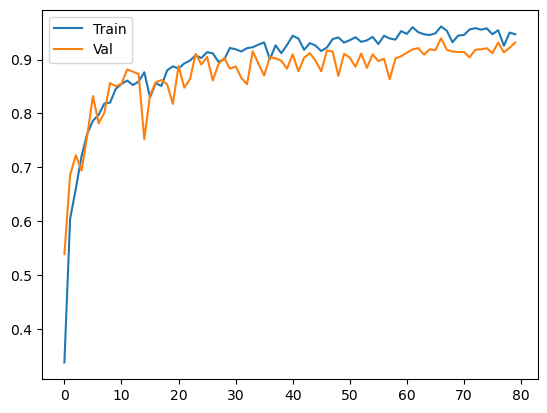

In [38]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [39]:
modeloCNN.evaluate(test_generator)

19/19 [==============================] - 17s 879ms/step - loss: 2.7913 - accuracy: 0.7770


[2.7913155555725098, 0.7770154476165771]

In [13]:
history = modeloCNN2.fit(
    train_generator,
    epochs=70,
    validation_data=validation_generator,
    # callbacks=[checkpoint_cb_2]
)

Epoch 1/70
46/46 [==============================] - 166s 4s/step - loss: 4.1244 - accuracy: 0.5132 - val_loss: 25.1526 - val_accuracy: 0.1176
Epoch 2/70
46/46 [==============================] - 141s 3s/step - loss: 2.6867 - accuracy: 0.6240 - val_loss: 44.0489 - val_accuracy: 0.1415
Epoch 3/70
46/46 [==============================] - 141s 3s/step - loss: 1.7789 - accuracy: 0.6846 - val_loss: 42.6985 - val_accuracy: 0.1169
Epoch 4/70
46/46 [==============================] - 142s 3s/step - loss: 1.2371 - accuracy: 0.7193 - val_loss: 30.3594 - val_accuracy: 0.1169
Epoch 5/70
46/46 [==============================] - 140s 3s/step - loss: 1.0334 - accuracy: 0.7554 - val_loss: 19.8576 - val_accuracy: 0.1613
Epoch 6/70
46/46 [==============================] - 141s 3s/step - loss: 0.7692 - accuracy: 0.7853 - val_loss: 13.3760 - val_accuracy: 0.1789
Epoch 7/70
46/46 [==============================] - 141s 3s/step - loss: 0.6527 - accuracy: 0.8074 - val_loss: 16.4669 - val_accuracy: 0.1838
Epoch 

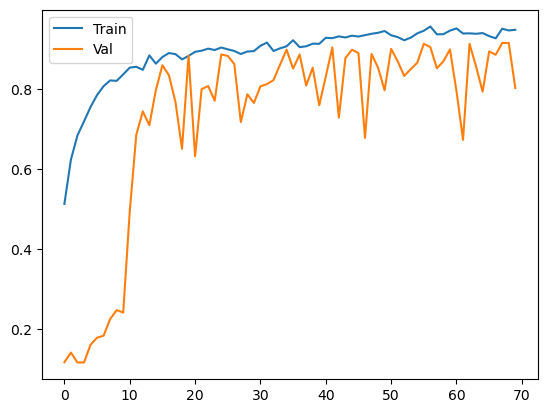

In [14]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [15]:
modeloCNN2.evaluate(test_generator)

19/19 [==============================] - 16s 869ms/step - loss: 4.8144 - accuracy: 0.6732


[4.81439733505249, 0.6732418537139893]

In [17]:
history = modeloCNN3.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    # callbacks=[checkpoint_cb_3]
)

Epoch 1/60
46/46 [==============================] - 154s 3s/step - loss: 16.0151 - accuracy: 0.5817 - val_loss: 60.1074 - val_accuracy: 0.1169
Epoch 2/60
46/46 [==============================] - 137s 3s/step - loss: 9.0655 - accuracy: 0.6116 - val_loss: 79.7954 - val_accuracy: 0.1169
Epoch 3/60
46/46 [==============================] - 138s 3s/step - loss: 4.9620 - accuracy: 0.6281 - val_loss: 126.4864 - val_accuracy: 0.1169
Epoch 4/60
46/46 [==============================] - 137s 3s/step - loss: 2.9357 - accuracy: 0.6164 - val_loss: 58.9153 - val_accuracy: 0.1169
Epoch 5/60
46/46 [==============================] - 136s 3s/step - loss: 2.2655 - accuracy: 0.6003 - val_loss: 59.9711 - val_accuracy: 0.1261
Epoch 6/60
46/46 [==============================] - 138s 3s/step - loss: 2.2056 - accuracy: 0.6319 - val_loss: 37.0841 - val_accuracy: 0.1761
Epoch 7/60
46/46 [==============================] - 148s 3s/step - loss: 1.8743 - accuracy: 0.6302 - val_loss: 31.4067 - val_accuracy: 0.1880
Epoc

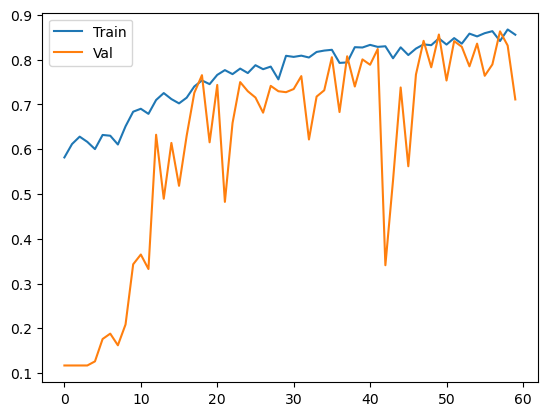

In [18]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [19]:
modeloCNN3.evaluate(test_generator)

19/19 [==============================] - 16s 857ms/step - loss: 3.5195 - accuracy: 0.5763


[3.5194530487060547, 0.5763293504714966]

In [26]:
history = modeloCNN4.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    # callbacks=[checkpoint_cb_4]
)

Epoch 1/60
46/46 [==============================] - 139s 3s/step - loss: 1.6081 - accuracy: 0.5129 - val_loss: 5.7313 - val_accuracy: 0.1169
Epoch 2/60
46/46 [==============================] - 137s 3s/step - loss: 1.1559 - accuracy: 0.6168 - val_loss: 6.7482 - val_accuracy: 0.1169
Epoch 3/60
46/46 [==============================] - 138s 3s/step - loss: 0.9864 - accuracy: 0.6591 - val_loss: 7.2259 - val_accuracy: 0.1169
Epoch 4/60
46/46 [==============================] - 138s 3s/step - loss: 0.8679 - accuracy: 0.6973 - val_loss: 7.4241 - val_accuracy: 0.1169
Epoch 5/60
46/46 [==============================] - 149s 3s/step - loss: 0.8095 - accuracy: 0.7110 - val_loss: 7.9387 - val_accuracy: 0.1169
Epoch 6/60
46/46 [==============================] - 140s 3s/step - loss: 0.7127 - accuracy: 0.7427 - val_loss: 7.0776 - val_accuracy: 0.1183
Epoch 7/60
46/46 [==============================] - 137s 3s/step - loss: 0.6690 - accuracy: 0.7609 - val_loss: 4.8329 - val_accuracy: 0.1514
Epoch 8/60
46

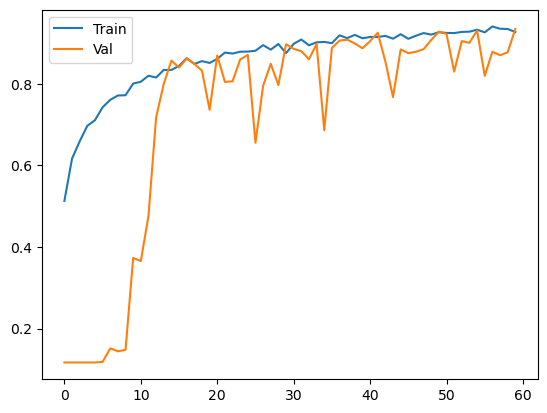

In [27]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [28]:
modeloCNN4.evaluate(test_generator)

19/19 [==============================] - 10s 514ms/step - loss: 1.6255 - accuracy: 0.7890


[1.625481128692627, 0.7890223264694214]

In [33]:
history = modeloCNN5.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator,
    # callbacks=[checkpoint_cb_5]
)

Epoch 1/60
46/46 [==============================] - 140s 3s/step - loss: 9.6593 - accuracy: 0.5494 - val_loss: 10.1011 - val_accuracy: 0.0986
Epoch 2/60
46/46 [==============================] - 132s 3s/step - loss: 5.8022 - accuracy: 0.7038 - val_loss: 6.7160 - val_accuracy: 0.1169
Epoch 3/60
46/46 [==============================] - 131s 3s/step - loss: 3.1305 - accuracy: 0.7159 - val_loss: 4.9558 - val_accuracy: 0.1183
Epoch 4/60
46/46 [==============================] - 132s 3s/step - loss: 2.1406 - accuracy: 0.7341 - val_loss: 4.8924 - val_accuracy: 0.1169
Epoch 5/60
46/46 [==============================] - 132s 3s/step - loss: 1.9011 - accuracy: 0.7355 - val_loss: 3.9490 - val_accuracy: 0.1324
Epoch 6/60
46/46 [==============================] - 131s 3s/step - loss: 1.7343 - accuracy: 0.7575 - val_loss: 4.9032 - val_accuracy: 0.2092
Epoch 7/60
46/46 [==============================] - 131s 3s/step - loss: 1.7345 - accuracy: 0.7547 - val_loss: 4.9599 - val_accuracy: 0.2190
Epoch 8/60
4

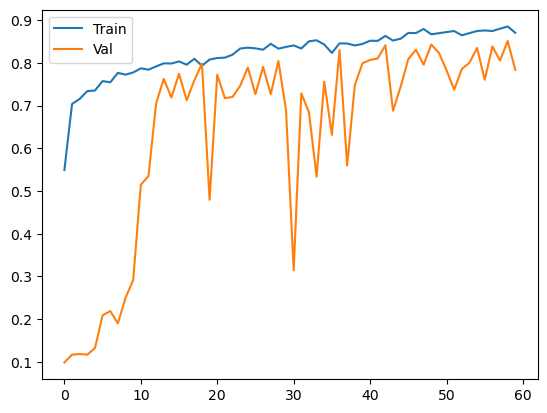

In [34]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [35]:
modeloCNN5.evaluate(test_generator)

19/19 [==============================] - 10s 518ms/step - loss: 4.2998 - accuracy: 0.6604


[4.299807071685791, 0.6603773832321167]

## Test with a pre-trained model (Inception_V3)

In [8]:
# Load images and apply Data Augmentation
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = "rgb")    

validation_generator_resize = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = "rgb")

test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = "rgb")

Found 2907 images belonging to 12 classes.
Found 1420 images belonging to 12 classes.
Found 1166 images belonging to 12 classes.


In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [10]:
pre_trained_model = InceptionV3(
    include_top=False,
    input_tensor=tf.keras.layers.Input(shape=(299,299,3)),
)

for layer in pre_trained_model.layers:
  layer.trainable = False 

pre_trained_model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [11]:
last_layers = pre_trained_model.get_layer("mixed8")
last_output = last_layers.output

In [12]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(100, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(12, activation = "softmax")(x)
#En la siguiente linea definimos donde inicia y donde finaliza  las capas
model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_keras.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
from tensorflow.keras.callbacks import TensorBoard

In [14]:
os.makedirs("models", exist_ok=True)
tensorboardModel_keras = TensorBoard(log_dir='models/model_keras')
history_keras = model_keras.fit(
    train_generator_resize,
    epochs = 10,
    validation_data = validation_generator_resize,
    # callbacks=[tensorboardModel_keras]
)

Epoch 1/10
46/46 [==============================] - 120s 2s/step - loss: 3.1900 - accuracy: 0.3357 - val_loss: 0.9615 - val_accuracy: 0.6739
Epoch 2/10
46/46 [==============================] - 74s 2s/step - loss: 1.1735 - accuracy: 0.5521 - val_loss: 0.7399 - val_accuracy: 0.7796
Epoch 3/10
46/46 [==============================] - 75s 2s/step - loss: 0.9682 - accuracy: 0.6295 - val_loss: 0.5201 - val_accuracy: 0.8479
Epoch 4/10
46/46 [==============================] - 76s 2s/step - loss: 0.8342 - accuracy: 0.6746 - val_loss: 0.4599 - val_accuracy: 0.8669
Epoch 5/10
46/46 [==============================] - 74s 2s/step - loss: 0.8332 - accuracy: 0.6828 - val_loss: 0.3868 - val_accuracy: 0.8965
Epoch 6/10
46/46 [==============================] - 75s 2s/step - loss: 0.7299 - accuracy: 0.7165 - val_loss: 0.4261 - val_accuracy: 0.8620
Epoch 7/10
46/46 [==============================] - 76s 2s/step - loss: 0.6994 - accuracy: 0.7203 - val_loss: 0.3429 - val_accuracy: 0.9028
Epoch 8/10
46/46 [=

In [15]:
result = model_keras.evaluate(test_generator_resize)

19/19 [==============================] - 16s 836ms/step - loss: 1.1829 - accuracy: 0.8139


### Tests with test data:

In [16]:
import numpy as np

In [17]:
# Get an image of the test builder
image_array, true_label = test_generator_resize.next()

In [18]:
# Make the prediction using the model
prediction = model_keras.predict(image_array)

2/2 [==============================] - 4s 21ms/step


In [70]:
# Decode the prediction to get the predicted label
predicted_class = np.argmax(prediction[0])

In [71]:
# Load the corresponding actual and predicted label
labels = list(test_generator_resize.class_indices.keys())
true_label_name = labels[np.argmax(true_label)]
predicted_label_name = labels[predicted_class]

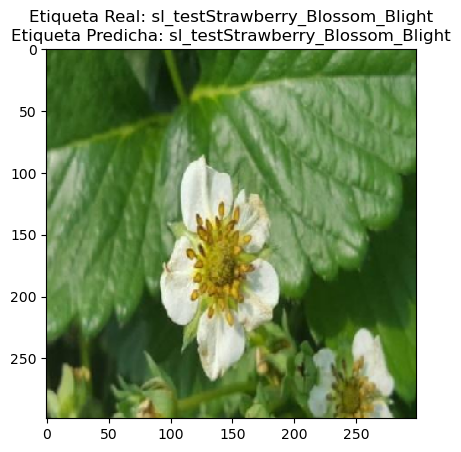

In [72]:
# Preprocesses the image in reverse to be able to display it
inverse_preprocessed_image = image_array[0] 
plt.imshow(inverse_preprocessed_image)
plt.title(f"Etiqueta Real: {true_label_name}\nEtiqueta Predicha: {predicted_label_name}")
plt.show()

### Tests with real data:

In [19]:
from tensorflow.keras.preprocessing import image

In [20]:
# Path to the folder containing the images
image_folder = "/kaggle/input/data-image/"

# Image names
image_names = ["tomato_blight (1).jpg", "tomato_blight.jpg", "tomato_leaf_mold.jpg"]

1/1 [==============================] - 0s 28ms/step


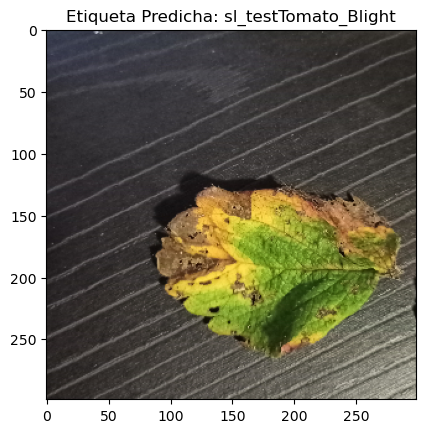

1/1 [==============================] - 0s 27ms/step


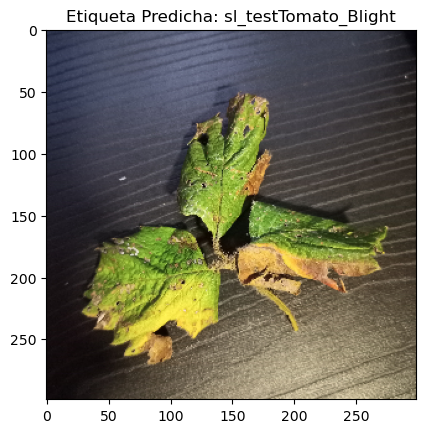

1/1 [==============================] - 0s 29ms/step


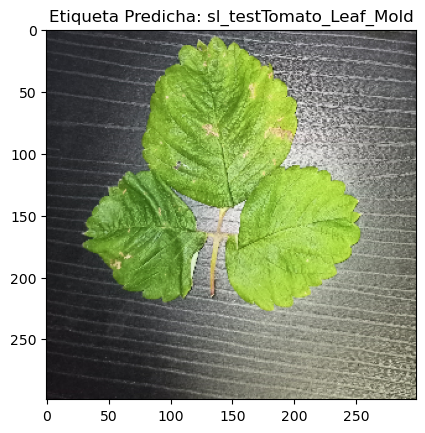

In [22]:
# Preprocessing and prediction for each image
for image_name in image_names:
    # Full path of the image
    image_path = image_folder + image_name
    
    # Upload and resize the image
    img = image.load_img(image_path, target_size=(299, 299))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expands dimensions to match model input format
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image
    preprocessed_img_array = img_array / 255.0  # Normalization
    
    # Make the prediction using the model
    prediction = model_keras.predict(preprocessed_img_array)
    
    # Decode the prediction to get the predicted label
    predicted_class = np.argmax(prediction[0])
    
    # Load the corresponding predicted label
    labels = list(test_generator_resize.class_indices.keys())
    predicted_label_name = labels[predicted_class]
    
    # View the image and the predicted label
    plt.imshow(img)
    plt.title(f"Etiqueta Predicha: {predicted_label_name}")
    plt.show()

In [ ]:
model_keras.save('data.h5')

In [81]:
!pip install tensorflowjs

In [77]:
!mkdir values_output

In [80]:
!pip install numpy==1.22.0  # Instala una versión compatible con SciPy

In [79]:
!echo "y" | pip uninstall tensorflow-io
!pip uninstall tensorflow-io  # Desinstala TensorFlow I/O
!pip install tensorflow-io   # Vuelve a instalar TensorFlow I/O

Found existing installation: tensorflow-io 0.31.0
Uninstalling tensorflow-io-0.31.0:
  Would remove:
    /opt/conda/lib/python3.10/site-packages/tensorflow_io-0.31.0.dist-info/*
    /opt/conda/lib/python3.10/site-packages/tensorflow_io/*
Proceed (Y/n)?   Successfully uninstalled tensorflow-io-0.31.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 44.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0


In [ ]:
!tensorflowjs_converter --input_format keras data.h5 values_output